# OLIST : Brazillian Ecommerce Data Analysis
---

## Context Understanding

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.

Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. 

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.


## Customer Segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

In [64]:
## Customer Segmentation

# 1. Data Preparation

In [3]:
#Library imports
import os

## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML Library

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ML TrainTest Split
from sklearn.model_selection import train_test_split
#ML Report
from sklearn.metrics import  accuracy_score

#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

#Set display columns to accomodate all columns
pd.options.display.max_columns = 100

In [7]:
# import os

# relative_path = "FINAL PROJECT PURWADHIKA/Dataset"
# full_path = os.path.join(absolute_path, relative_path)

In [30]:
import os
#Define ROOT_DIR as the root directory of the project on your local machine
ROOT_DIR = os.path.realpath(os.path.join(os.path.dirname('dw-finpro-alpha.ipynb'), '..'))
ROOT_DIR


'/Users/Dwika/My Projects'

In [31]:
#Load data tables into dataframe
df_customer = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_customers_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_order_items_dataset.csv'))  
df_order_payments = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_order_reviews_dataset.csv'))
df_orders = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_orders_dataset.csv'))
df_products = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_products_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/olist_sellers_dataset.csv'))
df_category_translation = pd.read_csv(os.path.join(ROOT_DIR, 'FINAL PROJECT PURWADHIKA/Dataset/product_category_name_translation.csv')) 

<Axes: ylabel='product_category_name_english'>

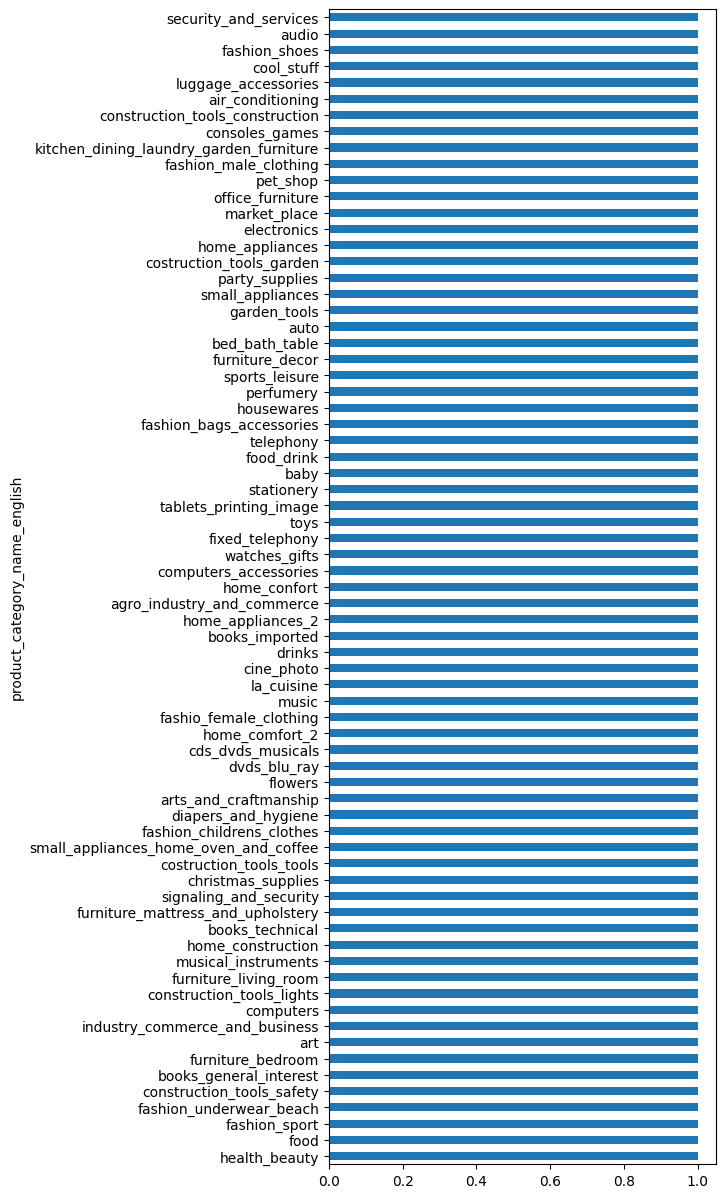

In [38]:
df_category_translation['product_category_name_english'].value_counts().plot(kind='barh', figsize=(5,15))

In [39]:
#  Create Main Dataframe for RFM Analysis
df_main = pd.merge(df_orders, df_order_items, on='order_id')
df_main = pd.merge(df_main, df_products, on='product_id')
df_main = pd.merge(df_main, df_sellers, on='seller_id')
df_main = pd.merge(df_main, df_customer, on='customer_id')
df_main = pd.merge(df_main, df_order_payments, on='order_id')
df_main = pd.merge(df_main, df_order_reviews, on='order_id')
df_main = pd.merge(df_main, df_category_translation, on='product_category_name')
df_main.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares


In [41]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   order_item_id                  115609 non-null  int64  
 9   product_id                     115609 non-null  object 
 10  seller_id                      115609 non-null  object 
 11  shipping_limit_date            115609 non-null  object 
 12  price                         

<Axes: ylabel='product_category_name_english'>

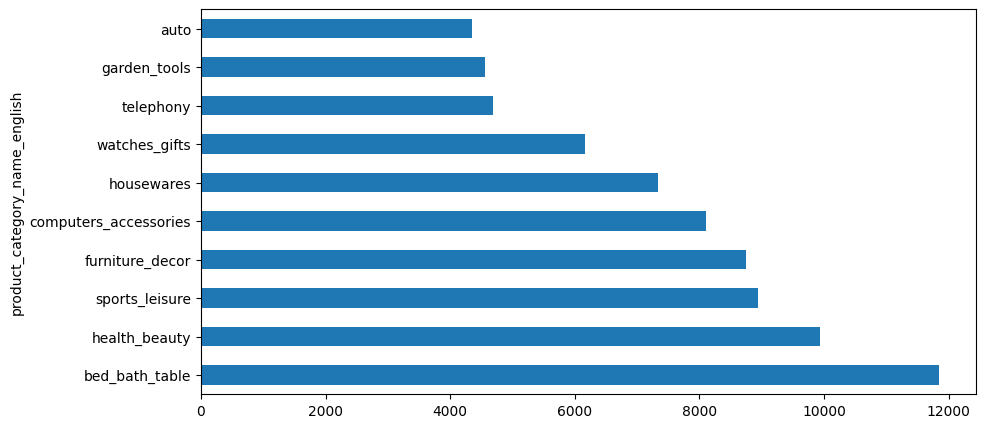

In [63]:
df_main.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))

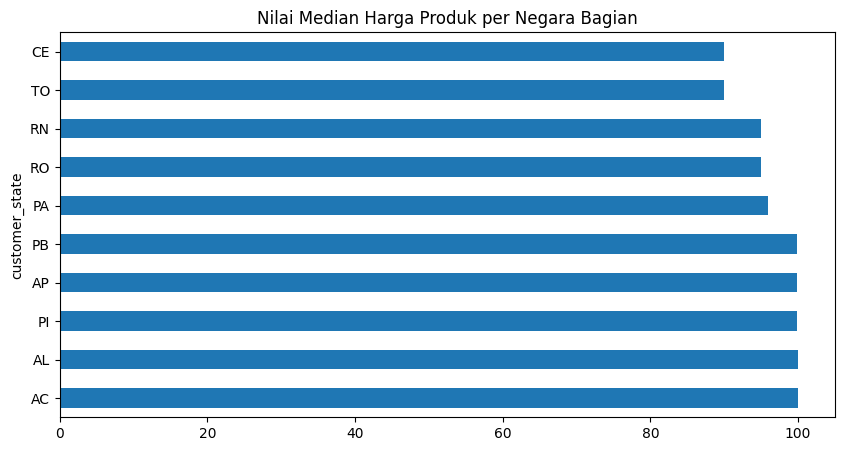

In [61]:
# df_main.groupby('customer_state').median()['price'].sort_values(ascending=True).plot.barh()

df_main.groupby('customer_state')['price'].median().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))
plt.title('Nilai Median Harga Produk per Negara Bagian')
plt.show()